<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
Exploratory Data Analysis Project Submission

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Missing data and its imputation](#section402)<br/>
    - 4.3 [Outlier Treatment](#section403)<br/>
    - 4.4 [Handling NaN data in categorical variables](#section404)<br/>            
    - 4.5 [Grouping](#section405)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Quality vs Citric Acid](#section501)<br/>
    - 5.2 [Density vs Chlorides](#section502)<br/>
    - 5.3 [Quality vs Chlorides](#section503)<br/>
    - 5.4 [Quality vs Volatile Acidity](#section504)<br/>
    - 5.5 [Quality vs Sulphur dioxide](#section505)<br/>
    - 5.6 [Quality vs Alcohol percent in wine](#section506)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [How does the Alcohol percentage have an impact on the Wine Quality?](#section601)<br/>
     - 6.2 [How do we do rating for the same](#section602)<br/>
     - 6.3 [Analysis of Sulphates and Wine ratings](#section603)<br/>
     - 6.4 [Analysis of Citric acid and Wine ratings](#section604)<br/>
     - 6.5 [Analysis of pH and Wine ratings](#section605)<br/>
 - 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 

"This dataset is from a dataset which has data about wine variants in portuguese wine"
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Wine variant of Portuguese "Vinho Verde" Wine"
- __Description__: "With over 6498 responses, we believe the dataset is one of the largest done on wine data in portuguese industry. 

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [4]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

mh = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv")                       # Load in the dataset as mh

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 

In [5]:
mh.dtypes                                                                       # Display the data type for each variable

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<a id=section302></a> 

In [6]:
mh.head()                                                                      # Display the first five rows of the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section303><a/>

In [4]:
mh.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Observations

As we can see there is no missing value in all the columns in the dataset. Hence we need not do any change with the dataset and proceed with analysing the same.

We can see 

**Fixed Acidity, Volatile Acidity, Free Sulfur dioxide, Total Sulfur dioxide ** column is having an almost **normal distribution** because the **mean ** values is close to the **median ** value.

The distribution of **Fixed Acidity, Sulphates, Alcohol** is **positive (right) skewed** because the **mean** of **Fixed Acidity, Sulphates, Alcohol** lies to the **right** of the **median(50%)** value on a **distribution plot**. 
  
The **max** value of **residual Sugar, Free sulphur dioxide** is an **outlier** because it lie far away from the mean.
  
  

<a id=section304></a> 

In [7]:
mh.sample(10)                                                                  # Display a random 10 rows from the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4460,6.4,0.21,0.28,5.90,0.047,29.0,101.0,0.99278,3.15,0.40,11.0,6
5376,6.5,0.33,0.28,6.10,0.018,41.0,103.0,0.99122,3.24,0.32,12.2,6
4262,8.0,0.13,0.25,1.10,0.033,15.0,86.0,0.99044,2.98,0.39,11.2,8
5050,6.6,0.21,0.29,5.35,0.029,43.0,106.0,0.99112,2.93,0.43,11.5,7
1739,6.3,0.31,0.34,2.20,0.045,20.0,77.0,0.99270,3.30,0.43,10.2,5
5141,6.6,0.23,0.37,8.50,0.036,46.0,153.0,0.99576,3.20,0.48,9.4,6
563,7.6,0.29,0.49,2.70,0.092,25.0,60.0,0.99710,3.31,0.61,10.1,6
5038,6.7,0.40,0.22,8.80,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5
617,11.5,0.31,0.51,2.20,0.079,14.0,28.0,0.99820,3.03,0.93,9.8,6
4444,6.5,0.22,0.29,7.40,0.028,16.0,87.0,0.99311,3.15,0.56,10.9,7


<a id=section305><a/>

In [8]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(mh)
profile.to_file(output_file="myoutputfile.html")                                 # HTML file will be downloaded to your workspace


<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Quality</strong> (integer)
 - <em>Numeric</em>: Everything else (Float)
- The following variables have null values that may need to addressed.
 - <strong>Citric Acid</strong>:  This should be null only when <strong>wine does not have</strong> this acid in them 

<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
  - It will be important to decide how to handle values with zero in them.


<a id=section4></a> 
### 4. Data Normalization

<a id=section401><a/>

<a id=section401></a> 

### 4.1. Standardize all column headers to lower case 

In [12]:
mh.columns = map(str.lower, mh.columns)                                  # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
mh.dtypes                                                                # Confirm that all variable names are now lower case

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


<a id=section402></a>

### 4.2. Missing Data and its imputation

In [9]:
#missing data
total = mh.isnull().sum().sort_values(ascending=False)
percent = (mh.isnull().sum()/mh.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                      Total  Percent
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total_sulfur_dioxide      0      0.0
free_sulfur_dioxide       0      0.0
chlorides                 0      0.0
residual_sugar            0      0.0
citric_acid               0      0.0
volatile_acidity          0      0.0
fixed_acidity             0      0.0


In [10]:
#dealing with missing data
#We need not get rid of any column as there is no missing data in the data set
mh.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section403></a> 

### 4.3. Outliers Treatment

For the purpose of this analysis, simply remove any __"out-of-range age values in Free Sulphur Dioxide and Residual Sugar"__, .  In a more detailed analysis it could be worth looking more closely at the rows with out-of-range values and deciding whether it makes more sense to analyse them. 



Text(0.5, 1.0, 'Free Sulfur Dioxide vs Quality')

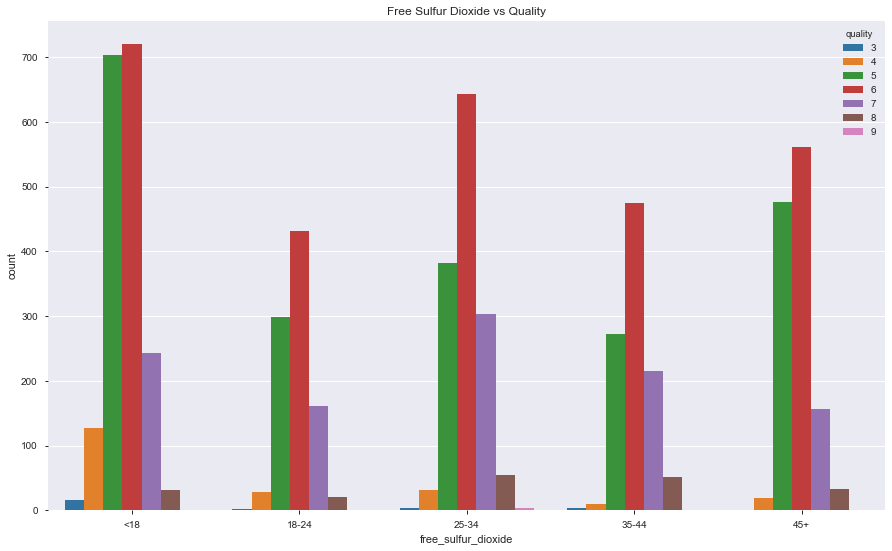

In [64]:
fig,ax =plt.subplots(figsize=(15,9))
sns.countplot(data = mh,x = 'free_sulfur_dioxide', hue='quality')
plt.title('Free Sulfur Dioxide vs Quality')



#### Observations:
It can be infered from the above plot that the __Sulphur dioxide content (Less than 18) is having maximum values in dataset, followed by (25-34) and then by 45+ .__ 


Text(0.5, 1.0, 'residual_sugar_Group vs Quality')

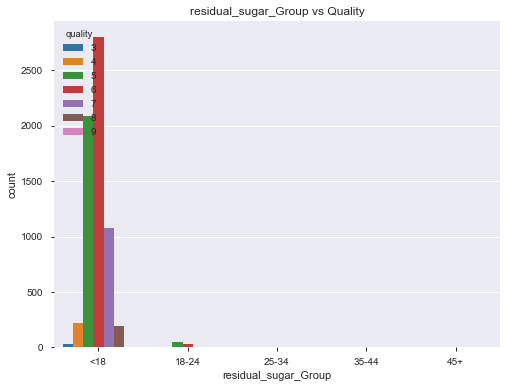

In [11]:
mh['residual_sugar_Group'] = pd.cut(mh['residual_sugar'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = mh,x = 'residual_sugar_Group', hue='quality')
plt.title('residual_sugar_Group vs Quality')


#### Observations
- Majority values is between 0 and 18 for residual sugar.  

#### Pandas profiling post data manipulation

In [89]:
post_profile = pandas_profiling.ProfileReport(mh)
post_profile.to_file(output_file="post_profiling.html")

#### Create a copy of "mh" dataframe for Label encoding

In [16]:
mh_new = mh.copy(deep=True)                                                       # creating new dataframe to make any datatype changes over it and keep the original dataframe as it is..

#### Dealing with Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in mh_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    mh_new[i] = number.fit_transform(mh_new[i].astype('str'))

<a id=section404><a/>

#### Correlation of Features

In [18]:
corr=mh_new.corr()['quality']
corr[np.argsort(corr,axis=0)[::-1]]

quality                 1.000000
citric_acid             0.086891
residual_sugar_Group    0.050054
sulphates               0.042679
residual_sugar          0.034841
pH                      0.019540
free_sulfur_dioxide    -0.031721
total_sulfur_dioxide   -0.058512
fixed_acidity          -0.082276
alcohol                -0.182010
chlorides              -0.230422
volatile_acidity       -0.263919
density                -0.318416
Name: quality, dtype: float64

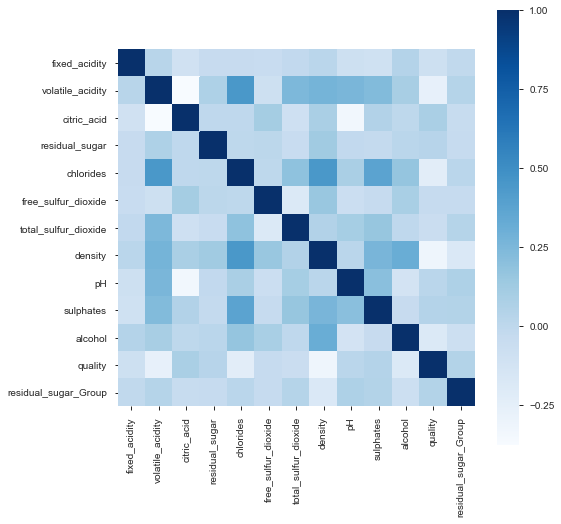

In [19]:
features_correlation = mh_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation

__density__,__volatile_acidity__,__sulphates__,are correalated with __chlorides__ and same with __alcohol__ is correlated with __density__

<a id=section5><a/>

### 5. Identify patterns in the data

<a id=section501><a/>

### 5.1. Quality v. Citric Acid

Citirc acid is correlated to the quality of the wine - The more it is adds freshness to the flavour in wine.

In [13]:
df = pd.DataFrame({'quality': mh['quality'], 'citric_acid': mh['citric_acid']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)

print("Pearson:", df_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:               quality  citric_acid
quality      1.000000     0.086891
citric_acid  0.086891     1.000000



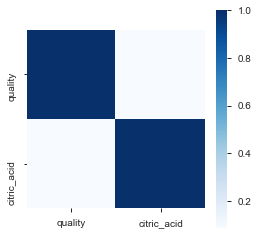

In [20]:
features = df_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

<a id=section502><a/>

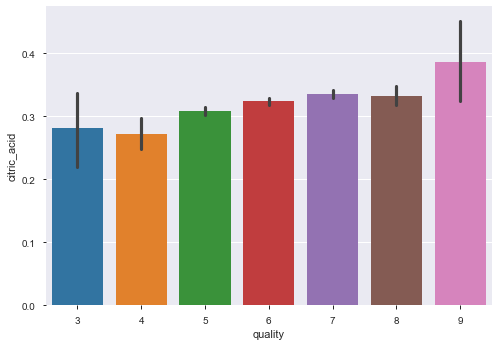

In [21]:

sns.barplot(x = 'quality', y = 'citric_acid', data = mh)


<a id=section502><a/>
    
### 5.2. Density v. Chlorides

Density and chlorides are  highly correlated to each other.

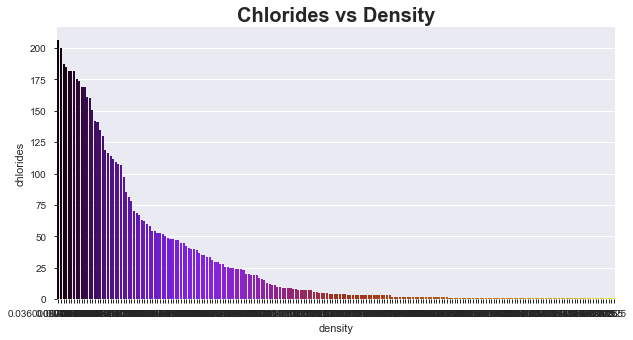

In [110]:

plt.figure(figsize=(10,5))
sns.countplot('chlorides',data = mh, order = mh['chlorides'].value_counts().index,palette="gnuplot")
plt.title("Chlorides vs Density",fontsize=20,fontweight="bold")
plt.ylabel("chlorides")
plt.xlabel("density")
plt.show()

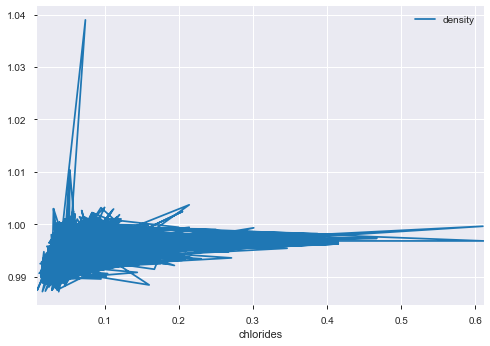

In [109]:
import matplotlib.pyplot as plt # Impot the relevant module

fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
mh.plot(x = 'chlorides', y = 'density', ax = ax) 


### Observation
This plot proves that the value of _density_ increases when the _chloride_ content in wine decreases.


<a id=section503><a/>


### 5.3. Quality v. Chlorides


There appears to be a pretty clear correlation between these two variables, it is following a bell curve.

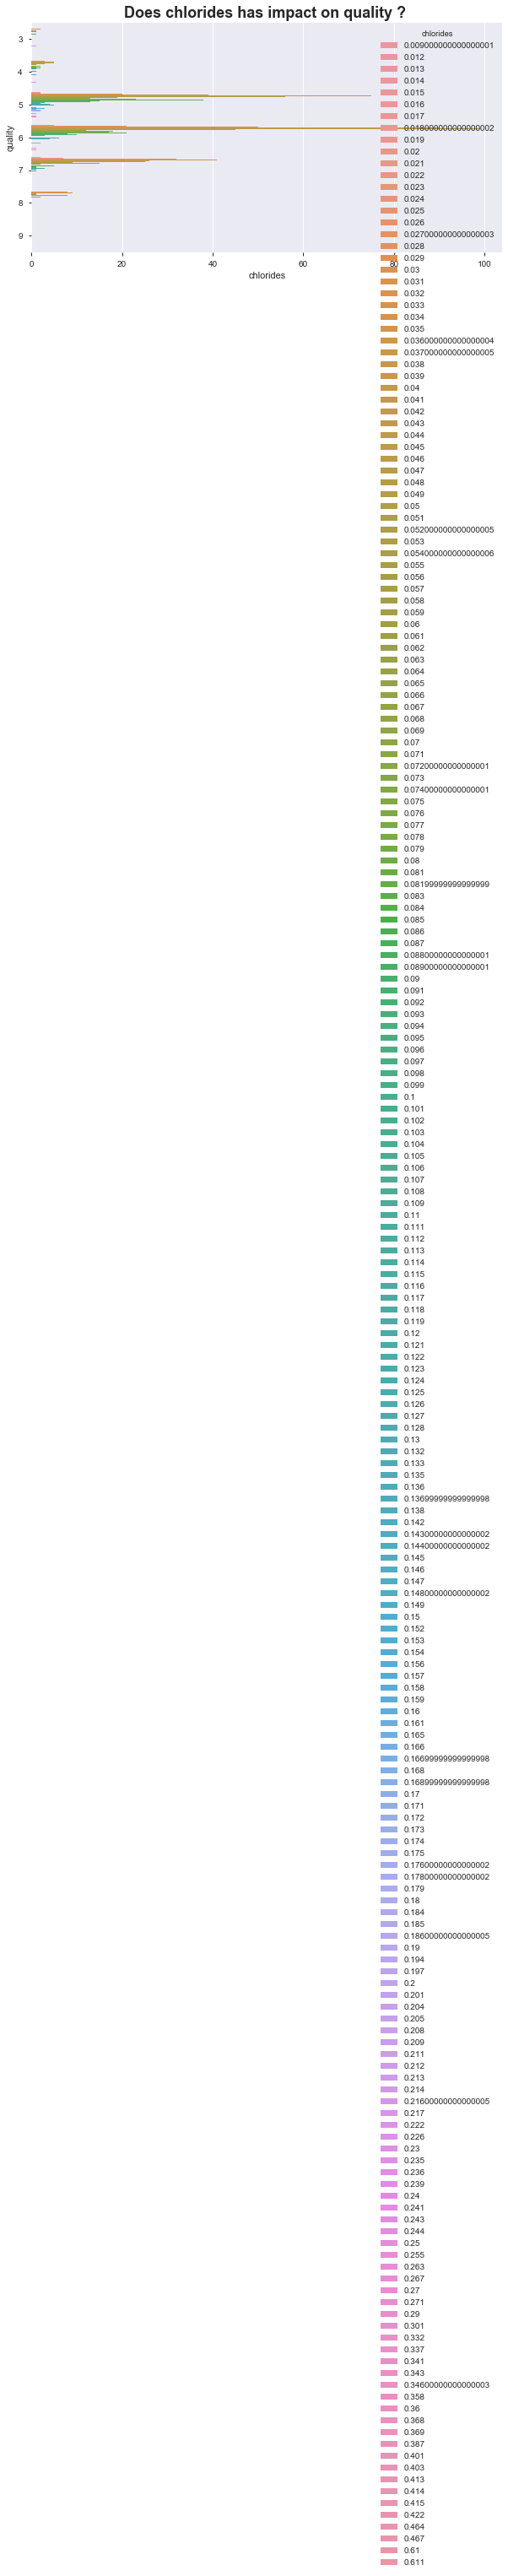

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y="quality", hue="chlorides", data=mh)
plt.title("Does chlorides has impact on quality ? ",fontsize=18,fontweight="bold")
plt.ylabel("quality")
plt.xlabel("chlorides")
plt.show()

### Observation

The quality is hovering around 5 and 6 for majority of the cases with chloride values.

<a id=section504><a/>

### 5.4. Quality vs Volatile Acidity

The lesser the volatile acidity the higher the quaity of the wine. 

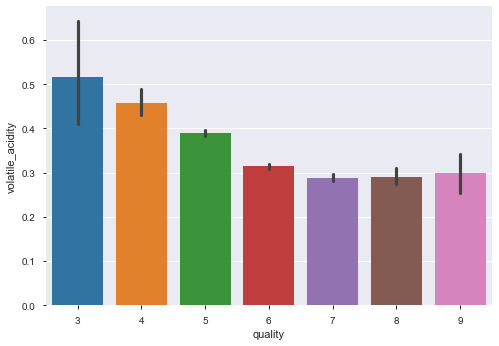

In [23]:
sns.barplot(x = 'quality', y = 'volatile_acidity', data = mh)



### Observation
More the Volatile acidity the quality of the wine reduces considerably.

<a id=section505><a/>

### 5.5. Quality vs Sulphur dioxide

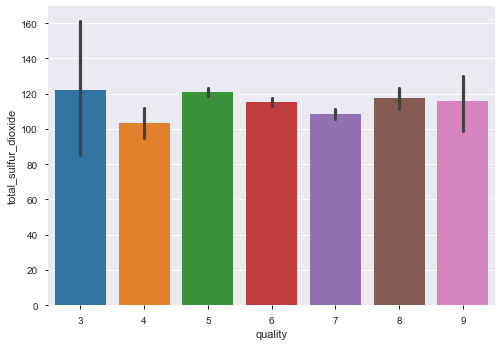

In [24]:
    sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = mh)


### Observation
This data shows that total sulphur dioxide has no impact on the quality of the wine.

<a id=section506><a/>

### 5.6. Quality vs Alcohol percent in wine

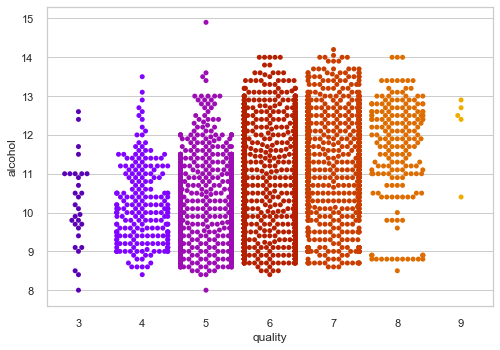

In [25]:
sns.set(style="whitegrid", palette="muted")


# "Melt" the dataset to "long-form" or "tidy" representation
pd.melt(mh, "quality")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="quality", y="alcohol", 
              palette='gnuplot', data=mh)

### Observation
Alcohol percent at 9 to 13 give the best taste to the wine content.

<a id=section6></a>
### 6. Analysis through questions

<a id=section601><a/>

### 6.1.  How does the Alcohol percentage have an impact on the Wine Quality?

Explore the __alcohol percentage__ data and its relationship to the Wine quality. High Alcohol percentage 

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

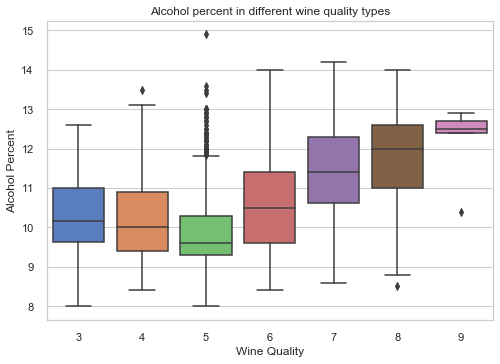

In [26]:
bx = sns.boxplot(x="quality", y='alcohol', data = mh)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

#### Observation

As from the above plot it can be seen that higher the alcohol percentage the quality of the wine seemed to be better. 

<a id=section603><a/>

#### 6.2. How do we do rating for the same?

Let's create a new discreet categorical response variable ('rating') from the existing 'quality' variable.
i.e bad: 1-4
    average : 5-6
    good : 7-10


In [28]:
conditions = [
    (mh['quality'] >= 7),
    (mh['quality'] <= 4)
]
rating = ['good', 'bad']
mh['rating'] = np.select(conditions, rating, default='average')
mh.rating.value_counts()

average    4974
good       1277
bad         246
Name: rating, dtype: int64

In [29]:
mh.groupby('rating').mean()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165
bad,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
good,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966


#### Observation

We can see maximum cases almost 77% fall under average and around 20 plus % fall under good and some 3 % fall under bad category.

<a id=section604><a/>

#### 6.3 Analysis of Sulphates and Wine ratings:

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

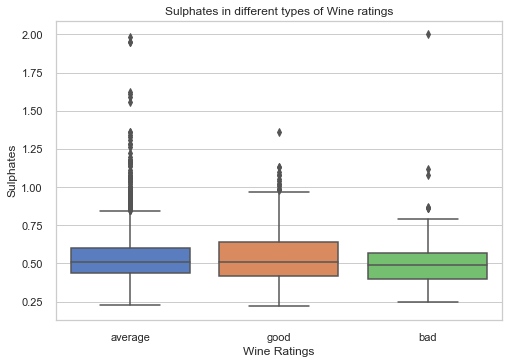

In [30]:
bx = sns.boxplot(x="rating", y='sulphates', data = mh)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

#### Observation

We can see majority cases have 0.50 as median but they are some outliers as well in all the three versions of Wine quality.

<a id=section605><a/>

#### 6.4. Analysis of Citric acid and Wine ratings:

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Citric_acid in different types of Wine ratings')]

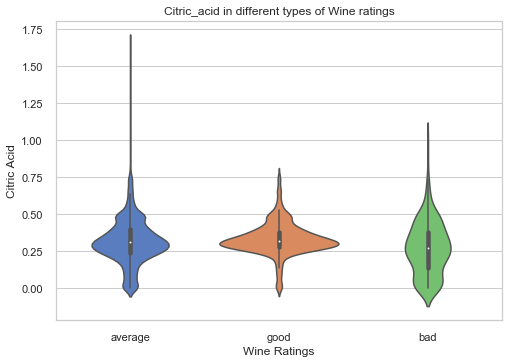

In [32]:
bx = sns.violinplot(x="rating", y='citric_acid', data = mh)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric_acid in different types of Wine ratings')

#### Observation

At around 0.30 to 0.35 value of Citric acid values we have the great wine rating and even the averge has the maximum at around the same area and caanot infer for bad wine rating samples.


<a id=section606><a/>



#### 6.5. Analysis of pH and Wine ratings:

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

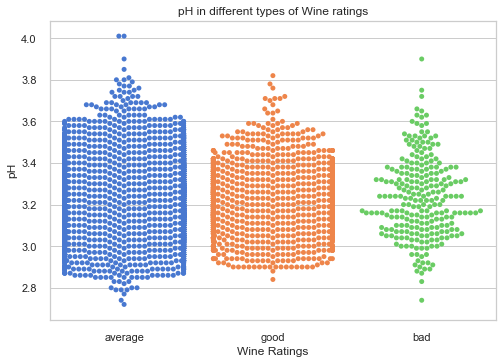

In [40]:


bx = sns.swarmplot(x="rating", y="pH", data = mh)
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

#### Observation

We can see majority good quality wine rating cases have been between 3.0 to 3.4 ph value.

<a id=section605><a/>



### Conclusion

- The data with over 6498 samples of wine mixture is used to trace the exact mix to get the best quality output. (__Section 1.2__)

- Total of __6498__ entries were made during the data pick up and can see maximum cases almost 77% fall under average and around 20 plus % fall under good and some 3 % fall under bad category.(__From: Section 6.2__)

- As from the above plot it can be seen that higher the alcohol percentage the quality of the wine seemed to be better.(__From: Section 6.1__)

- We can see majority cases have 0.50 as median but they are some outliers as well in all the three versions of Wine quality.(__From: Section 6.3__)

- At around 0.30 to 0.35 value of Citric acid  we have the great wine rating and even the averge has the maximum at around the same area and caanot infer for bad wine rating samples.(__From: Section 6.4__)

- 3.0 to 3.4 is the ideal value for the wine to taste good enough.(__From: Section 6.5__)